In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("bases_de_dados/Sivep/bases_novas/not_encoded/sivep_kids_atualizado_not_encoded_selected_by_chi_evo.csv")
df.drop(df[df['outcome_final_SIVEP'] == "in-hospital"].index, inplace = True)
df['Doses_vacina'] = df['Doses_vacina'].map({'zero': 'zero', 'uma':'uma', 'duas':'duas', 'tres':'tres','missing':'zero'})

In [33]:
df['outcome_final_SIVEP'].value_counts()

discharge    20742
death         1511
Name: outcome_final_SIVEP, dtype: int64

In [5]:
from pycaret.classification import *
s = setup(df, target = 'outcome_final_SIVEP', session_id = 125, 
          log_experiment = True, experiment_name = 'evo_1', remove_multicollinearity = True, max_encoding_ohe=100, fix_imbalance=True, fix_imbalance_method="SMOTEENN")

In [6]:
best = compare_models(exclude=['lightgbm', 'ridge', 'svm', 'dummy'])

In [7]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [8]:
lr = create_model('lr', return_train_score = True)

In [9]:
tuned_lr = tune_model(lr)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [10]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [11]:
print(tuned_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [12]:
calibrated_lr = calibrate_model(tuned_lr)

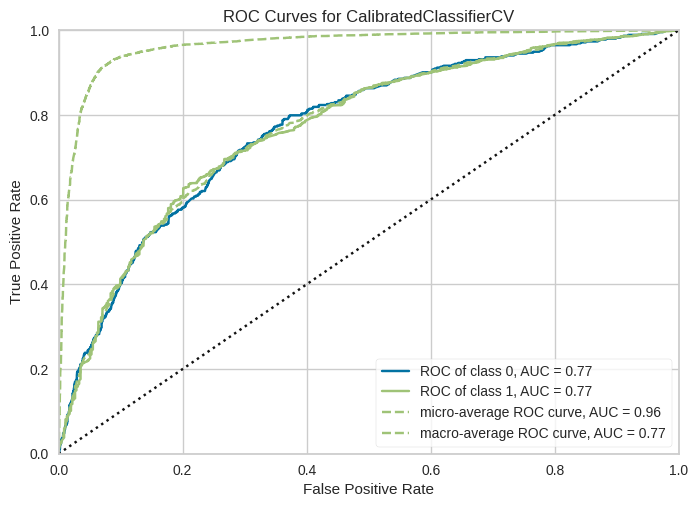

In [13]:
plot_model(calibrated_lr, plot = 'auc')

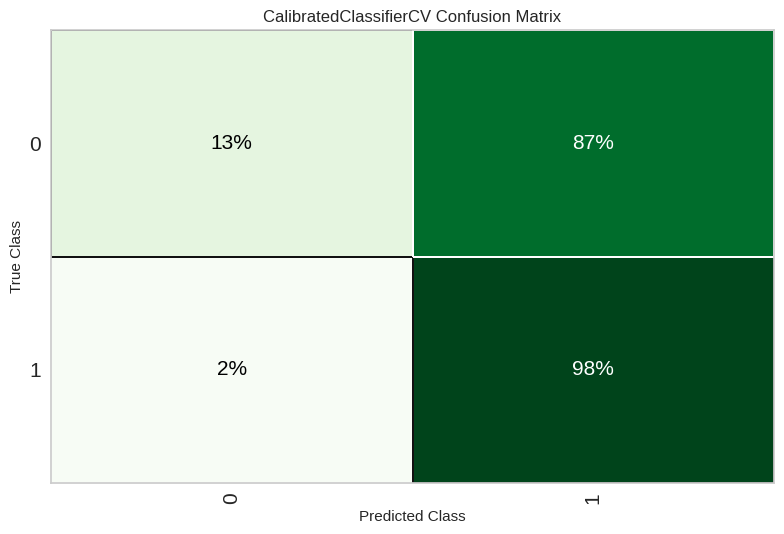

In [14]:
plot_model(calibrated_lr, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

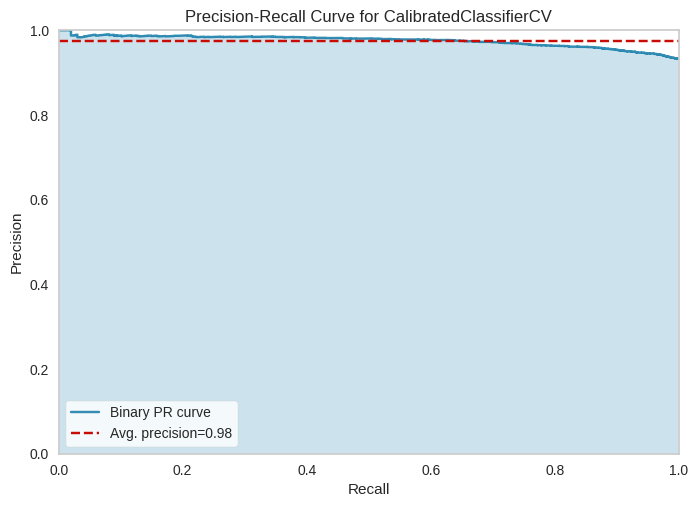

In [15]:
plot_model(calibrated_lr, plot = 'pr')

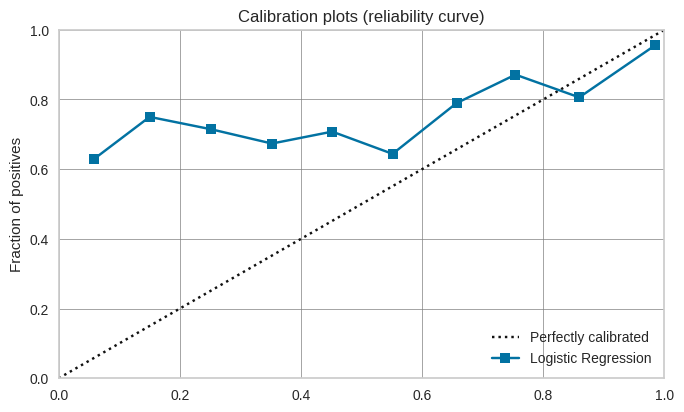

In [16]:
plot_model(calibrated_lr, plot = 'calibration')

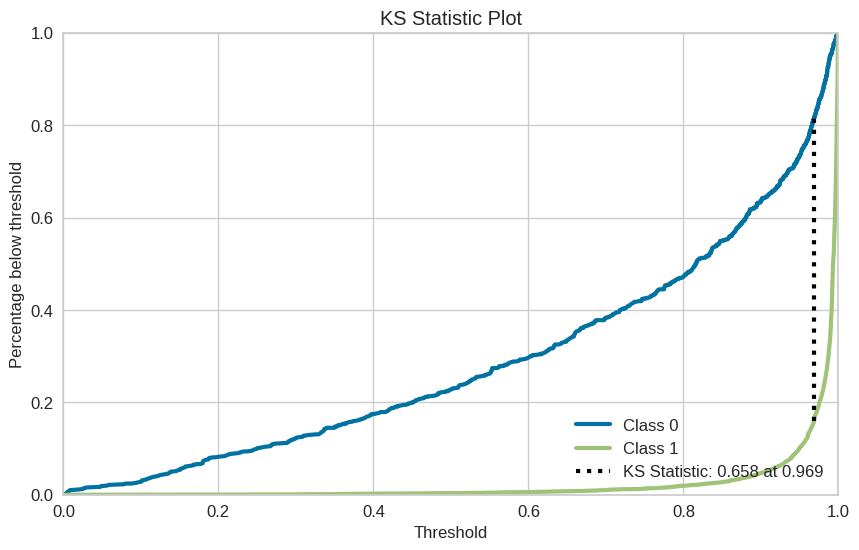

In [17]:
plot_model(calibrated_lr, plot = 'ks')

In [18]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

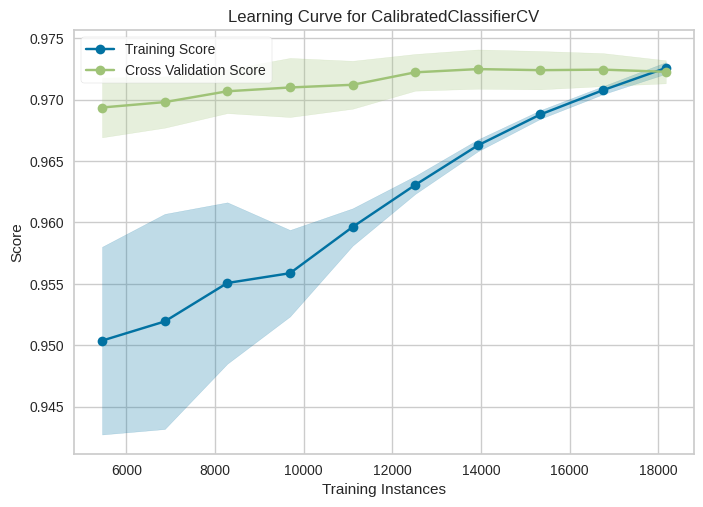

In [19]:
plot_model(calibrated_lr, plot = 'learning')

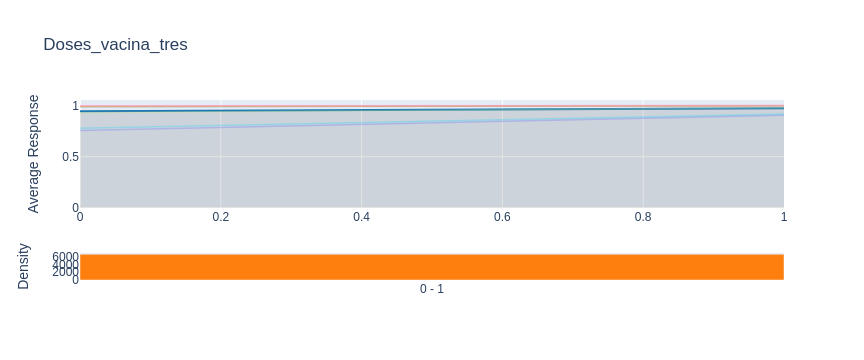

In [20]:
interpret_model(calibrated_lr, plot = 'pdp', feature = 'Doses_vacina_tres')

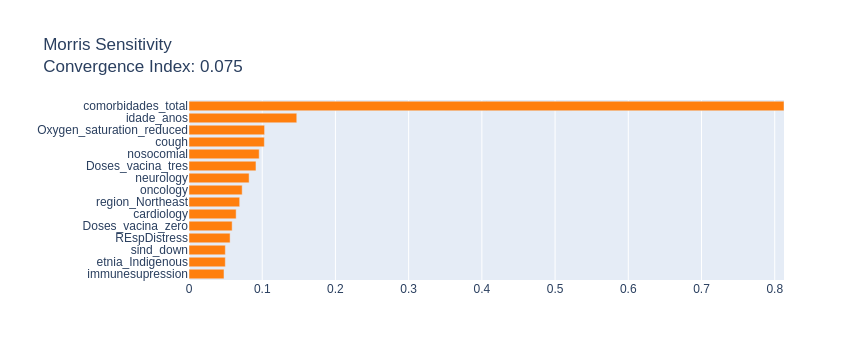

In [21]:
interpret_model(calibrated_lr, plot = 'msa')

33it [00:00, 49.61it/s]


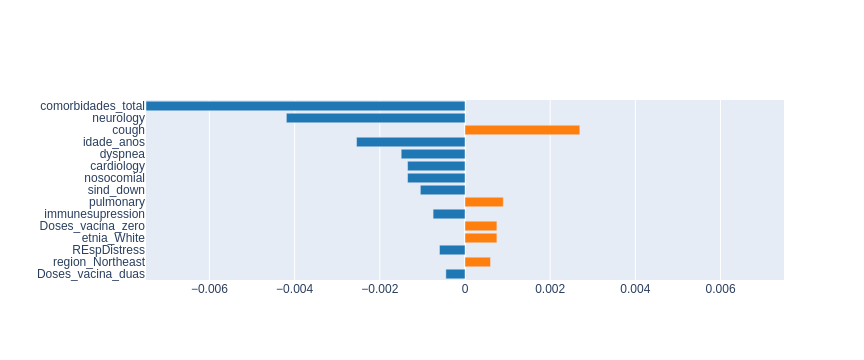

In [22]:
interpret_model(calibrated_lr, plot = 'pfi')

In [24]:
interpret_model(calibrated_lr, plot = 'reason', observation = 1)

TypeError: This function only supports tree based models for binary classification: dt, xgboost, lightgbm, rf, catboost, et.

Found 25 subgroups. Evaluation may be slow


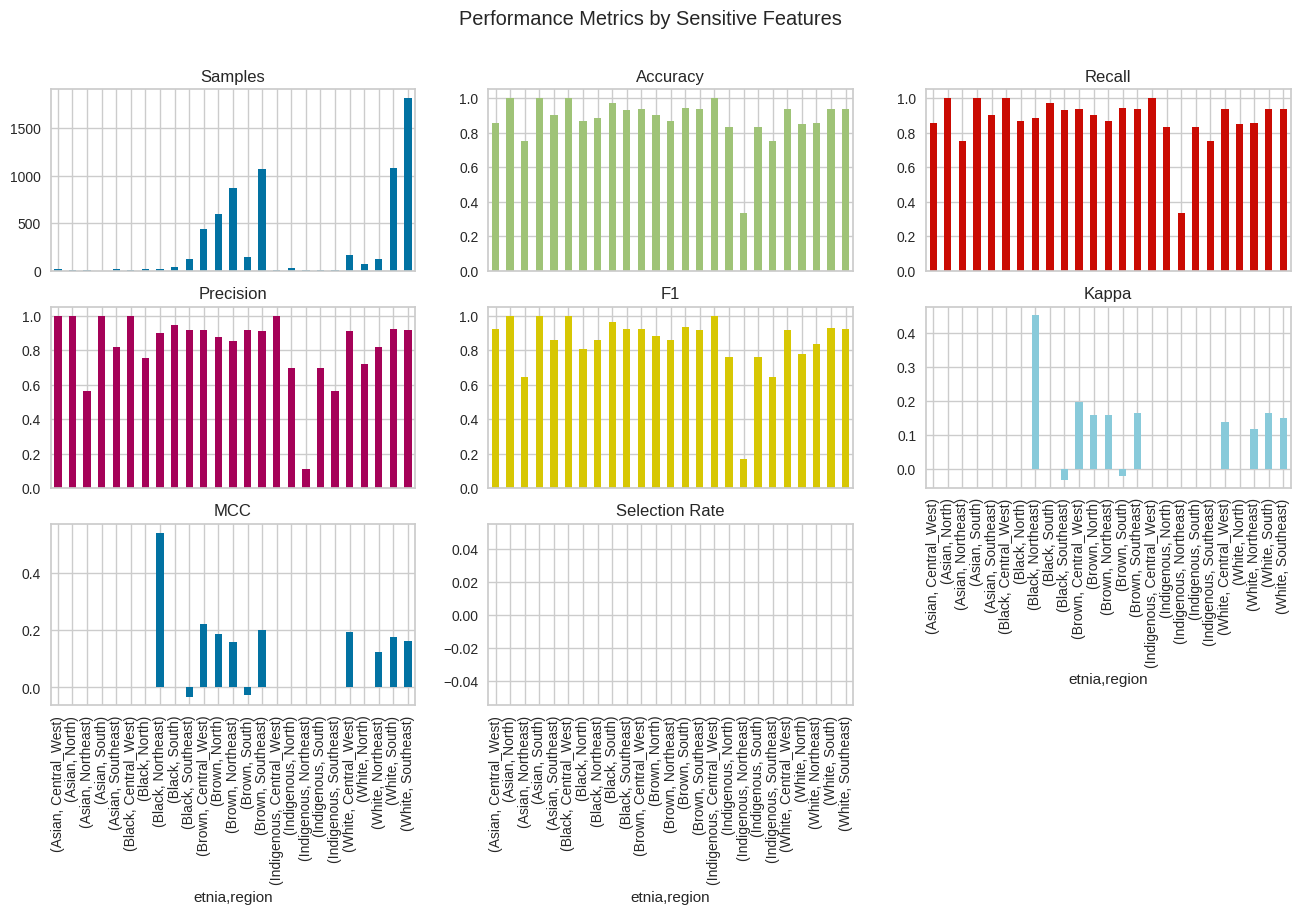

In [26]:
lr_fairness = check_fairness(calibrated_lr, sensitive_features = ['etnia', 'region'])

In [27]:
predict_model(calibrated_lr)

idade_anos  etnia        region Virus_strain dyspnea cough  \
5184     1.000000  White     Southeast      omicron     nao   nao   
5547     1.000000  Brown  Central_West        gamma     sim   sim   
23986    2.333333  Brown     Southeast      omicron     nao   sim   
2273     1.000000  Brown     Southeast      omicron     sim   sim   
11315    1.000000  White     Southeast      omicron     nao   sim   
...           ...    ...           ...          ...     ...   ...   
13129    2.666667  White     Southeast        gamma     sim   sim   
8371    14.083333  Brown     Southeast        gamma     nao   nao   
11944    1.000000  Brown     Northeast        gamma     nao   sim   
20993   15.000000  White     Southeast      omicron     nao   nao   
5492     1.000000  White         South        delta     sim   sim   

      REspDistress Oxygen_saturation_reduced cardiology pulmonary  ...  \
5184           sim                       sim        nao       nao  ...   
5547           sim                       sim        nao       nao  ...   
23986          nao                       nao        nao       nao  ...   
2273           sim                       sim        nao       nao  ...   
11315          sim                       nao        nao       nao  ...   
...            ...                       ...        ...       ...  ...   
13129          nao                       sim        nao       nao  ...   
8371           nao                       nao        nao       nao  ...   
11944          sim                       nao        nao       nao  ...   
20993          nao                       nao        nao       nao  ...   
5492           sim                       sim        nao       nao  ...   

      comorbidades_total Doses_vacina hematology  neurology oncology  \
5184                 0.0         zero        nao        nao      nao   
5547                 0.0         zero        nao        nao      nao   
23986                0.0         zero        nao        nao      nao   
2273                 0.0         zero        nao        nao      nao   
11315                0.0         zero        nao        nao      nao   
...                  ...          ...        ...        ...      ...   
13129                0.0         zero        nao        nao      nao   
8371                 2.0         zero        nao        nao      nao   
11944                0.0         zero        nao        nao      nao   
20993                0.0         zero        nao        nao      nao   
5492                 0.0         zero        nao        nao      nao   

      sind_down nosocomial outcome_final_SIVEP prediction_label  \
5184        nao        sim                   1        discharge   
5547        nao        nao                   1        discharge   
23986       nao        nao                   1        discharge   
2273        nao        nao                   1        discharge   
11315       nao        nao                   1        discharge   
...         ...        ...                 ...              ...   
13129       nao        nao                   1        discharge   
8371        nao        nao                   1        discharge   
11944       nao        nao                   1        discharge   
20993       nao        nao                   1        discharge   
5492        nao        nao                   1        discharge   

      prediction_score  
5184            0.9406  
5547            0.9900  
23986           0.9992  
2273            0.9923  
11315           0.9988  
...                ...  
13129           0.9971  
8371            0.8250  
11944           0.9927  
20993           0.9883  
5492            0.9896  

[6676 rows x 23 columns]

In [28]:
predict_model(calibrated_lr, raw_score=True)

idade_anos  etnia        region Virus_strain dyspnea cough  \
5184     1.000000  White     Southeast      omicron     nao   nao   
5547     1.000000  Brown  Central_West        gamma     sim   sim   
23986    2.333333  Brown     Southeast      omicron     nao   sim   
2273     1.000000  Brown     Southeast      omicron     sim   sim   
11315    1.000000  White     Southeast      omicron     nao   sim   
...           ...    ...           ...          ...     ...   ...   
13129    2.666667  White     Southeast        gamma     sim   sim   
8371    14.083333  Brown     Southeast        gamma     nao   nao   
11944    1.000000  Brown     Northeast        gamma     nao   sim   
20993   15.000000  White     Southeast      omicron     nao   nao   
5492     1.000000  White         South        delta     sim   sim   

      REspDistress Oxygen_saturation_reduced cardiology pulmonary  ...  \
5184           sim                       sim        nao       nao  ...   
5547           sim                       sim        nao       nao  ...   
23986          nao                       nao        nao       nao  ...   
2273           sim                       sim        nao       nao  ...   
11315          sim                       nao        nao       nao  ...   
...            ...                       ...        ...       ...  ...   
13129          nao                       sim        nao       nao  ...   
8371           nao                       nao        nao       nao  ...   
11944          sim                       nao        nao       nao  ...   
20993          nao                       nao        nao       nao  ...   
5492           sim                       sim        nao       nao  ...   

      Doses_vacina hematology neurology  oncology sind_down nosocomial  \
5184          zero        nao       nao       nao       nao        sim   
5547          zero        nao       nao       nao       nao        nao   
23986         zero        nao       nao       nao       nao        nao   
2273          zero        nao       nao       nao       nao        nao   
11315         zero        nao       nao       nao       nao        nao   
...            ...        ...       ...       ...       ...        ...   
13129         zero        nao       nao       nao       nao        nao   
8371          zero        nao       nao       nao       nao        nao   
11944         zero        nao       nao       nao       nao        nao   
20993         zero        nao       nao       nao       nao        nao   
5492          zero        nao       nao       nao       nao        nao   

      outcome_final_SIVEP prediction_label prediction_score_death  \
5184                    1        discharge                 0.0594   
5547                    1        discharge                 0.0100   
23986                   1        discharge                 0.0008   
2273                    1        discharge                 0.0077   
11315                   1        discharge                 0.0012   
...                   ...              ...                    ...   
13129                   1        discharge                 0.0029   
8371                    1        discharge                 0.1750   
11944                   1        discharge                 0.0073   
20993                   1        discharge                 0.0117   
5492                    1        discharge                 0.0104   

      prediction_score_discharge  
5184                      0.9406  
5547                      0.9900  
23986                     0.9992  
2273                      0.9923  
11315                     0.9988  
...                          ...  
13129                     0.9971  
8371                      0.8250  
11944                     0.9927  
20993                     0.9883  
5492                      0.9896  

[6676 rows x 24 columns]

In [31]:
create_app(calibrated_lr)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/home/adriano/anaconda3/envs/pycaret/lib/python3.10/site-packages/pandas/core/arrays/categorical.py", line 441, in __init__
    codes, categories = factorize(values, sort=True)
  File "/home/adriano/anaconda3/envs/pycaret/lib/python3.10/site-packages/pandas/core/algorithms.py", line 822, in factorize
    codes, uniques = factorize_array(
  File "/home/adriano/anaconda3/envs/pycaret/lib/python3.10/site-packages/pandas/core/algorithms.py", line 578, in factorize_array
    uniques, codes = table.factorize(
  File "pandas/_libs/hashtable_class_helper.pxi", line 5943, in pandas._libs.hashtable.PyObjectHashTable.factorize
  File "pandas/_libs/hashtable_class_helper.pxi", line 5857, in pandas._libs.hashtable.PyObjectHashTable._unique
TypeError: unhashable type: 'list'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/adriano/anaconda3/envs/pycaret/lib/python3.10/site-packages/gradio

Traceback (most recent call last):
  File "/home/adriano/anaconda3/envs/pycaret/lib/python3.10/site-packages/gradio/routes.py", line 508, in predict
    output = await route_utils.call_process_api(
  File "/home/adriano/anaconda3/envs/pycaret/lib/python3.10/site-packages/gradio/route_utils.py", line 219, in call_process_api
    output = await app.get_blocks().process_api(
  File "/home/adriano/anaconda3/envs/pycaret/lib/python3.10/site-packages/gradio/blocks.py", line 1437, in process_api
    result = await self.call_function(
  File "/home/adriano/anaconda3/envs/pycaret/lib/python3.10/site-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/home/adriano/anaconda3/envs/pycaret/lib/python3.10/site-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/home/adriano/anaconda3/envs/pycaret/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 877, in run_s